# JuliaGeo
While the geospatial stack is not one of the selling points of Julia (yet), mostly due to its age as Python and R have had 20 years more to mature. However, it is already easy to install the required C dependencies and read all common data formats into Julia types that can be used accross the ecosystem.

JuliaGeo is a ([Github](https://github.com/JuliaGeo/)) organization that contains a number of related Julia projects for manipulating, querying, and processing geospatial geometry data. We aim to provide a common interface between geospatial packages. We also have a [website](https://juliageo.org).

We previously presented about JuliaGeo related work in:
- [FOSS4G2019 | JuliaGeo: A Fresh Approach to GeospatialComputing](https://media.ccc.de/v/bucharest-428-juliageo-a-fresh-approach-to-geospatial-computing)
- [JuliaCon2020 | GeoInterface: bringing geospatial packages together](https://www.youtube.com/watch?v=wih_DIWODUs)
- [JuliaCon2022 | State of JuliaGeo](https://www.youtube.com/watch?v=xMRcIpt6Ris)

In [17]:
using GeoDataFrames, GeoArrays, WellKnownGeometry, Downloads, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1662


### Download and opening a raster
Let's download and open a small geotiff file. We use `GeoArrays`, a package inspired by rasterio in Python.

In [89]:
url = "https://github.com/yeesian/ArchGDALDatasets/blob/master/data/utmsmall.tif?raw=true"
rfn = Downloads.download(url)
ga = GeoArrays.read(rfn)

100x100x1 Array{UInt8, 3} with AffineMap([60.0 0.0; 0.0 -60.0], [440720.0, 3.75132e6]) and CRS PROJCS["NAD27 / UTM zone 11N",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26711"]]

In [13]:
ga.A

100×100×1 Array{UInt8, 3}:
[:, :, 1] =
 0x6b  0x73  0x73  0x94  0x84  0xbd  …  0x10  0x10  0x21  0x42  0x42  0x84
 0x7b  0x84  0x84  0x84  0x9c  0xad     0x19  0x42  0x5a  0x73  0x8c  0xad
 0x84  0x6b  0x8c  0x7b  0x84  0xad     0xbd  0x63  0x63  0x84  0x8c  0x9c
 0x73  0x7b  0x84  0x7b  0x8c  0x94     0x5a  0x08  0x7b  0x94  0x9c  0x94
 0x84  0x94  0x7b  0x73  0x84  0x94     0x31  0x84  0xad  0x84  0x73  0x19
 0x84  0x73  0x73  0x84  0x84  0x73  …  0x94  0x5a  0xbd  0x94  0x3a  0x10
 0x8c  0xa5  0x8c  0x84  0x73  0x94     0x9c  0x84  0xad  0x31  0x10  0x19
 0x84  0x73  0x6b  0x7b  0x73  0x7b     0x52  0x73  0x19  0x08  0x10  0x19
 0x84  0x8c  0x8c  0x73  0x73  0x6b     0x73  0x3a  0x10  0x19  0x29  0x29
 0x84  0x6b  0x73  0x7b  0x7b  0x84     0xa5  0x19  0x21  0x10  0x21  0x4a
 0x6b  0x7b  0x84  0x73  0x94  0x73  …  0x84  0x19  0x29  0x19  0x19  0x52
 0x84  0x7b  0x7b  0x7b  0x7b  0x84     0x00  0x21  0x10  0x42  0x3a  0x6b
 0x6b  0x63  0x6b  0x6b  0xa5  0x9c     0x21  0x10  0x3a  0x4

In [14]:
ga.f

AffineMap([60.0 0.0; 0.0 -60.0], [440720.0, 3.75132e6])

In [15]:
ga.crs

GeoFormatTypes.WellKnownText{GeoFormatTypes.CRS}(GeoFormatTypes.CRS(), "PROJCS[\"NAD27 / UTM zone 11N\",GEOGCS[\"NAD27\",DATUM[\"North_American_Datum_1927\",SPHEROID[\"Clarke 1866\",6378206.4,294.978698213898,AUTHORITY[\"EPSG\",\"7008\"]],AUTHORITY[\"EPSG\",\"6267\"]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4267\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",-117],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"26711\"]]")

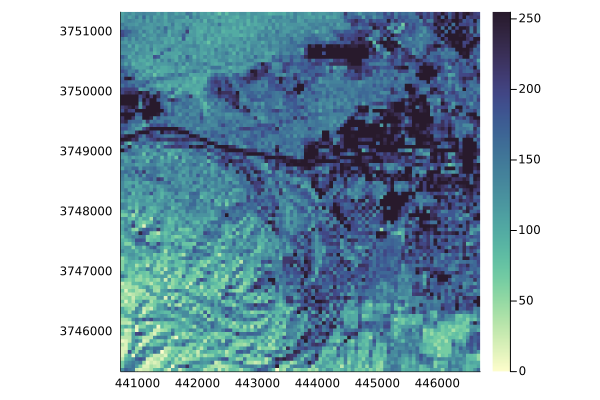

In [42]:
p = plot(ga; c=:deep)

In [44]:
ga2 = ga[2:50, 2:50]

49x49x1 Array{UInt8, 3} with AffineMap([60.0 0.0; 0.0 -60.0], [440780.0, 3.75126e6]) and CRS PROJCS["NAD27 / UTM zone 11N",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26711"]]

We can request the coordinates of a (center of a) cell with `coords`, and also do the inverse with `indices`

In [31]:
GeoArrays.coords(ga, (1,1))

2-element StaticArraysCore.SVector{2, Float64} with indices SOneTo(2):
 440750.0
      3.75129e6

In [34]:
GeoArrays.indices(ga, (440750.,3.75129e6))

2-element StaticArraysCore.SVector{2, Int64} with indices SOneTo(2):
 1
 1

We can also do the same with Rasters.jl, which also supports multidimensional datasets, such as NetCDF (like `xarray` in Python), rasterization of--or masking with--vector data, zonal statistics among others.

In [92]:
using Rasters
R = Raster(rfn)

100×100×1 Raster{UInt8,3} with dimensions: 
  X Projected LinRange{Float64}(440720.0, 446660.0, 100) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected LinRange{Float64}(3.75126e6, 3.74532e6, 100) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical 1:1 ForwardOrdered
[:, :, 1]
              3.75126e6     3.7512e6  …     3.74538e6     3.74532e6
 440720.0  0x6b          0x73            0x42          0x84
 440780.0  0x7b          0x84            0x8c          0xad
 440840.0  0x84          0x6b            0x8c          0x9c
 440900.0  0x73          0x7b            0x9c          0x94
 440960.0  0x84          0x94         …  0x73          0x19
 441020.0  0x84          0x73            0x3a          0x10
 441080.0  0x8c          0xa5            0x10          0x19
 441140.0  0x84          0x73            0x10          0x19
      ⋮                               ⋱     ⋮          
 446180.0  0xad          0xad         …  0x9c          0x94
 446240.0  0xd6       

In [118]:
R[X=446000..446660, Y=3.75e6..3.75126e6]

11×21×1 Raster{UInt8,3} with dimensions: 
  X Projected LinRange{Float64}(446000.0, 446600.0, 11) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected LinRange{Float64}(3.7512e6, 3.75e6, 21) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical 1:1 ForwardOrdered
[:, :, 1]
              3.7512e6     3.75114e6  …     3.75006e6     3.75e6
 446000.0  0xff         0xef             0xc5          0xc5
 446060.0  0xad         0xff             0xb5          0x9c
 446120.0  0xff         0xe6             0x9c          0xad
 446180.0  0xad         0xd6             0x8c          0x9c
 446240.0  0xde         0xff          …  0xb5          0xbd
 446300.0  0xff         0xff             0x84          0x7b
 446360.0  0xce         0xef             0xad          0x8c
 446420.0  0xff         0xb5             0xbd          0xff
 446480.0  0xbd         0xc5             0xbd          0xa5
 446540.0  0xd6         0xb5          …  0x94          0xad
 446600.0  0xce         0xff 

### Downloading and opening a vector dataset
We can also easily open vector datasets. We will use GeoDataFrames here, a package inspired by geopandas in Python.

In [45]:
url = "https://github.com/OpenGeoHub/spatial-prediction-eml/blob/master/input/gbif_aedes_albopictus.gpkg?raw=true"
fn = Downloads.download(url)
df = GeoDataFrames.read(fn)

,geom,gbifID,datasetKey,occurrenceID
,IGeometr…,Float64,String,String?
1,Geometry: wkbPoint,3.72352e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/226030224
2,Geometry: wkbPoint,3.72315e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/229897504
3,Geometry: wkbPoint,3.72176e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/222737616
4,Geometry: wkbPoint,3.72142e9,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/221356176
5,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E-Montesacro-M5-2020-06-30-1
6,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E-SAR-4_200804-1
7,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E_CRO_ZG_40_200612-1
8,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E-Montesacro-M1-2020-06-16-1
9,Geometry: wkbPoint,3.71405e9,03269e13-84ae-430f-990e-f11069413e36,E_SP_LesFonts_4_200902-1


In [55]:
filter!(row -> !ismissing(row.month), df);

In [83]:
plot(df.geom, marker_z=df.month, marker_s=2, msw=0, c=:turbo)  # found a bug!

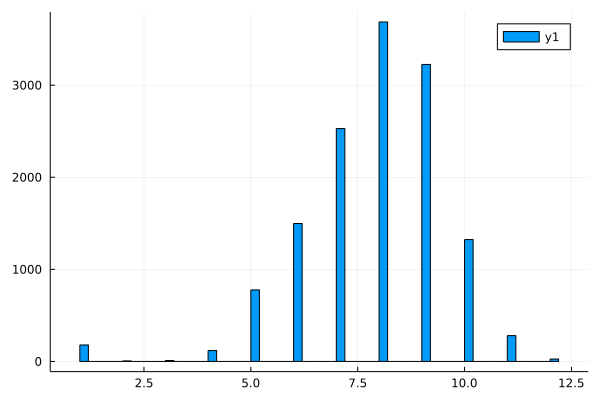

In [70]:
histogram(df.month)

### GeoInterface
This package describe a set of traits based on the Simple Features standard (SF) for geospatial vector data, including the SQL/MM extension with support for circular geometry. Using these traits, it should be easy to parse, serialize and use different geometries in the Julia ecosystem, without knowing the specifics of each individual package. In that regard it is similar to Tables.jl, but for geometries instead of tables.

In [103]:
using GeoInterface
geom = df.geom[1]

Geometry: POINT (3.206186 41.977133)

In [107]:
?geom

search: geom geomarea geomtrait geomlength GeometryFormat



No documentation found.

`geom` is of type `ArchGDAL.IGeometry{ArchGDAL.wkbPoint}`.

# Summary

```
mutable struct ArchGDAL.IGeometry{ArchGDAL.wkbPoint}
```

# Fields

```
ptr :: Ptr{Nothing}
```

# Supertype Hierarchy

```
ArchGDAL.IGeometry{ArchGDAL.wkbPoint} <: ArchGDAL.AbstractGeometry <: Any
```


In [108]:
GeoInterface.isgeometry(geom)

true

In [110]:
GeoInterface.geomtrait(geom)

PointTrait()

In [111]:
GeoInterface.ncoord(geom)

2

In [112]:
GeoInterface.coordinates(geom)

2-element Vector{Float64}:
  3.206186
 41.977133